SVR model with Linear Regression

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
best_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
best_svr.fit(X_train, y_train.ravel())

# Predict missing features using trends
predicted_features = ['population', 'gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add linear trend prediction for each feature
for feature in predicted_features:
    if feature in data.columns:
        # Fit a linear regression model to capture the trend
        trend_model = LinearRegression()
        trend_data = data[['year', feature]].dropna()
        trend_model.fit(trend_data[['year']], trend_data[feature])

        # Predict future values based on the trend
        prediction_years = pd.DataFrame({'year': list(range(2025, 2051))})
        feature_predictions[feature] = trend_model.predict(prediction_years)

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, 2051))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Scale prediction data
X_prediction_scaled = scaler_X.transform(prediction_data)

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Save predictions to CSV
prediction_data.to_csv('Waste_Predictions_2025_to_2050.csv', index=False)

# Display results
print(prediction_data)


    year    population           gdp  householdMinIncome          death  \
0   2025  3.494477e+07  1.624333e+06         8833.980000  205892.540000   
1   2026  3.538372e+07  1.668901e+06         8989.796923  210403.713846   
2   2027  3.582266e+07  1.713469e+06         9145.613846  214914.887692   
3   2028  3.626160e+07  1.758037e+06         9301.430769  219426.061538   
4   2029  3.670054e+07  1.802605e+06         9457.247692  223937.235385   
5   2030  3.713948e+07  1.847173e+06         9613.064615  228448.409231   
6   2031  3.757843e+07  1.891741e+06         9768.881538  232959.583077   
7   2032  3.801737e+07  1.936309e+06         9924.698462  237470.756923   
8   2033  3.845631e+07  1.980877e+06        10080.515385  241981.930769   
9   2034  3.889525e+07  2.025445e+06        10236.332308  246493.104615   
10  2035  3.933420e+07  2.070013e+06        10392.149231  251004.278462   
11  2036  3.977314e+07  2.114581e+06        10547.966154  255515.452308   
12  2037  4.021208e+07  2

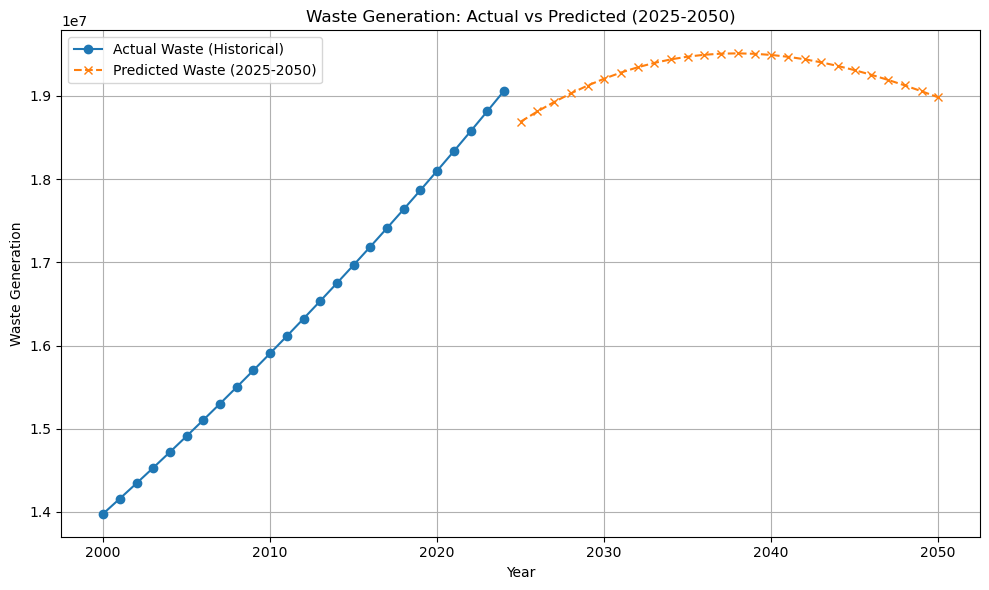

In [8]:
import matplotlib.pyplot as plt

# Load the predicted data
predicted_data = pd.read_csv('Waste_Predictions_2025_to_2050.csv')

# Combine actual and predicted data for visualization
visualization_data = pd.concat([
    data[['year', 'waste']].rename(columns={'waste': 'actual_waste'}),
    predicted_data[['year', 'predicted_waste']].rename(columns={'predicted_waste': 'waste'})
], ignore_index=True, sort=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(
    data['year'], 
    data['waste'], 
    label='Actual Waste (Historical)', 
    marker='o'
)
plt.plot(
    predicted_data['year'], 
    predicted_data['predicted_waste'], 
    label='Predicted Waste (2025-2050)', 
    linestyle='--', 
    marker='x'
)

# Customize the plot
plt.title('Waste Generation: Actual vs Predicted (2025-2050)')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on test data
y_test_pred = best_svr.predict(X_test)
y_test_pred_rescaled = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Metrics
mae = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_test_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_test_pred_rescaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 299354.324674277
Mean Squared Error (MSE): 121488044688.48071
R² Score: 0.953881312940209


     year    population           gdp  householdMinIncome          death  \
0    2025  3.494477e+07  1.624333e+06         8833.980000  205892.540000   
1    2026  3.538372e+07  1.668901e+06         8989.796923  210403.713846   
2    2027  3.582266e+07  1.713469e+06         9145.613846  214914.887692   
3    2028  3.626160e+07  1.758037e+06         9301.430769  219426.061538   
4    2029  3.670054e+07  1.802605e+06         9457.247692  223937.235385   
..    ...           ...           ...                 ...            ...   
171  2196  1.100039e+08  9.245459e+06        35478.673846  977303.267692   
172  2197  1.104428e+08  9.290027e+06        35634.490769  981814.441538   
173  2198  1.108818e+08  9.334595e+06        35790.307692  986325.615385   
174  2199  1.113207e+08  9.379163e+06        35946.124615  990836.789231   
175  2200  1.117597e+08  9.423731e+06        36101.941538  995347.963077   

     predicted_waste  
0       1.868978e+07  
1       1.881227e+07  
2       1.892545e+

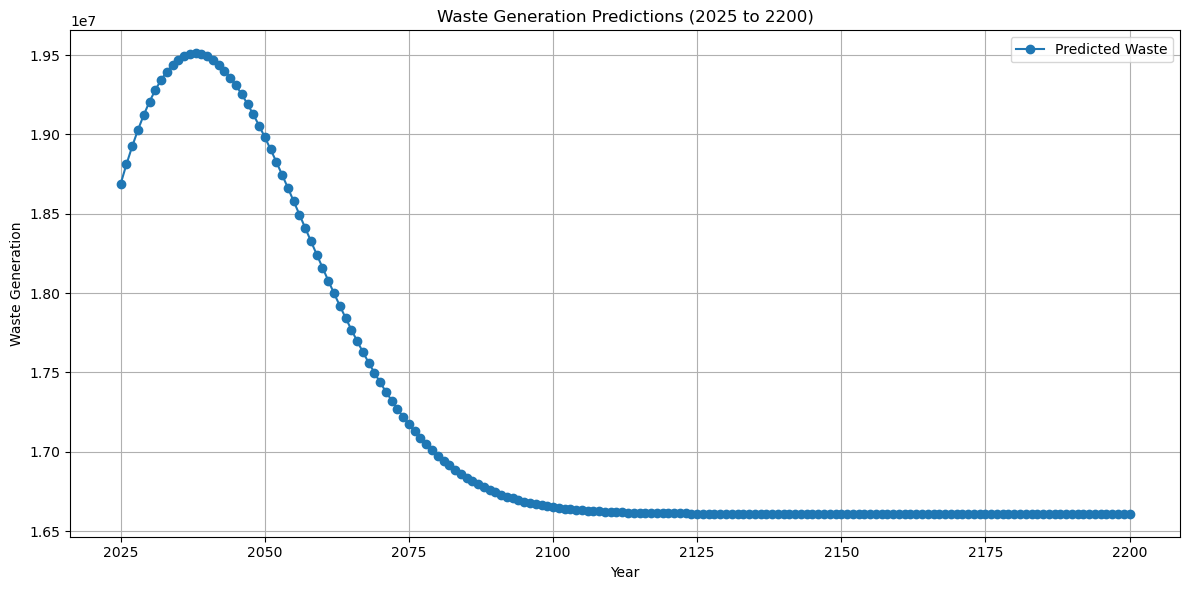

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
best_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
best_svr.fit(X_train, y_train.ravel())

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['population', 'gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add linear trend prediction for each feature
for feature in predicted_features:
    if feature in data.columns:
        # Fit a linear regression model to capture the trend
        trend_model = LinearRegression()
        trend_data = data[['year', feature]].dropna()
        trend_model.fit(trend_data[['year']], trend_data[feature])

        # Predict future values based on the trend
        prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
        feature_predictions[feature] = trend_model.predict(prediction_years)

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Scale prediction data
X_prediction_scaled = scaler_X.transform(prediction_data)

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste', marker='o')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


    year           gdp  householdMinIncome          death  predicted_waste
0   2025  1.624333e+06         8833.980000  205892.540000     1.866391e+07
1   2026  1.668901e+06         8989.796923  210403.713846     1.879757e+07
2   2027  1.713469e+06         9145.613846  214914.887692     1.892361e+07
3   2028  1.758037e+06         9301.430769  219426.061538     1.904167e+07
4   2029  1.802605e+06         9457.247692  223937.235385     1.915146e+07
..   ...           ...                 ...            ...              ...
71  2096  4.788660e+06        19896.981538  526185.883077     1.680859e+07
72  2097  4.833228e+06        20052.798462  530697.056923     1.679088e+07
73  2098  4.877796e+06        20208.615385  535208.230769     1.677451e+07
74  2099  4.922364e+06        20364.432308  539719.404615     1.675942e+07
75  2100  4.966932e+06        20520.249231  544230.578462     1.674552e+07

[76 rows x 5 columns]


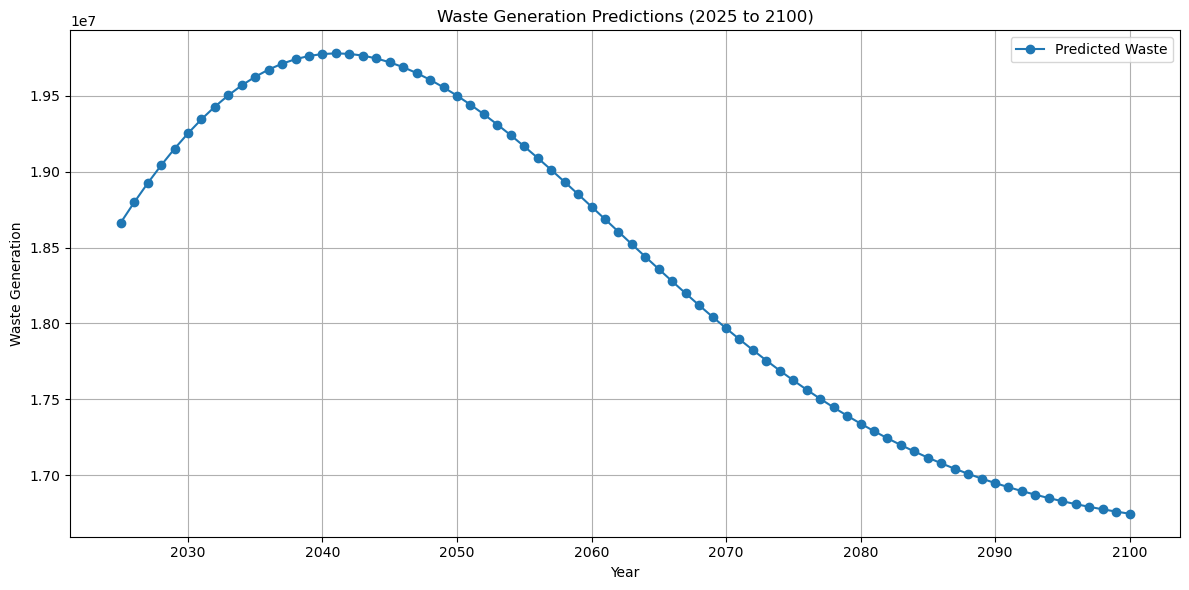

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_svr = grid_search.best_estimator_

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add polynomial or exponential trend prediction for each feature
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c

for feature in predicted_features:
    if feature in data.columns:
        trend_data = data[['year', feature]].dropna()

        if feature == 'gdp':
            # Use polynomial regression for GDP
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        elif feature == 'death':
            # Use exponential fit for death (to handle anomalies)
            try:
                popt, _ = curve_fit(exponential_growth, trend_data['year'], trend_data[feature], maxfev=10000)
                prediction_years = np.array(list(range(2025, end_year + 1)))
                feature_predictions[feature] = exponential_growth(prediction_years, *popt)
            except:
                # Fallback to linear regression if exponential fit fails
                linear_model = LinearRegression()
                linear_model.fit(trend_data[['year']], trend_data[feature])
                prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
                feature_predictions[feature] = linear_model.predict(prediction_years[['year']])
        else:
            # Use linear regression for householdMinIncome
            linear_model = LinearRegression()
            linear_model.fit(trend_data[['year']], trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            feature_predictions[feature] = linear_model.predict(prediction_years[['year']])

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Cap unrealistic growth in predictions
for feature in predicted_features:
    max_value = data[feature].max() * 1.5  # Allow 50% growth over historical max
    min_value = data[feature].min() * 0.8  # Allow 20% decrease from historical min
    prediction_data[feature] = prediction_data[feature].clip(lower=min_value, upper=max_value)

# Scale prediction data
X_prediction_scaled = scaler_X.transform(prediction_data)

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Calculate evaluation metrics on test data
y_test_pred_scaled = best_svr.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste', marker='o')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


c:\Users\Sukonbu\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_16844\4273092079.py:46: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but SVR is expecting 5 features as input.

    year           gdp  householdMinIncome         death  predicted_waste
0   2025  1.673647e+06         8833.980000  4.026960e+05     1.999746e+07
1   2026  1.729595e+06         8989.796923  8.052601e+05     2.156150e+07
2   2027  1.786386e+06         9145.613846  1.610256e+06     1.973418e+07
3   2028  1.844020e+06         9301.430769  3.219985e+06     1.666446e+07
4   2029  1.902496e+06         9457.247692  6.438915e+06     1.661039e+07
..   ...           ...                 ...           ...              ...
71  2096  7.740714e+06        19896.981538  9.398414e+26     1.661039e+07
72  2097  7.856512e+06        20052.798462  1.879375e+27     1.661039e+07
73  2098  7.973154e+06        20208.615385  3.758134e+27     1.661039e+07
74  2099  8.090638e+06        20364.432308  7.515036e+27     1.661039e+07
75  2100  8.208965e+06        20520.249231  1.502761e+28     1.661039e+07

[76 rows x 5 columns]
Mean Absolute Error (MAE): 277901.30106144806
Mean Squared Error (MSE): 117404484254.5223

c:\Users\Sukonbu\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_16844\3882789774.py:46: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


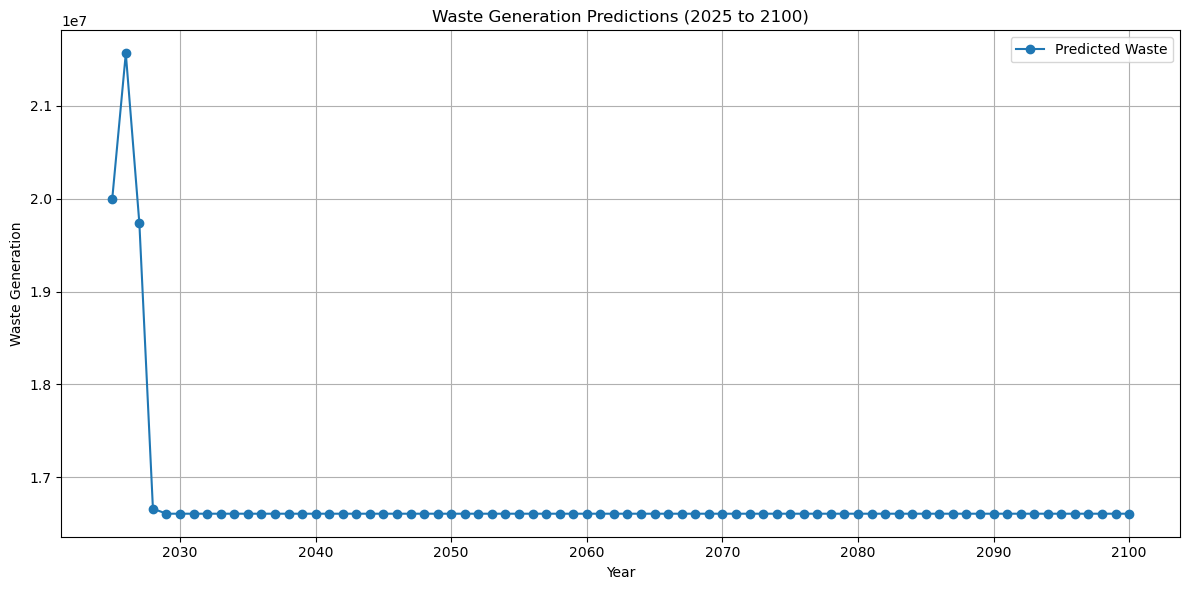

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_svr = grid_search.best_estimator_

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add polynomial or exponential trend prediction for each feature
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c

for feature in predicted_features:
    if feature in data.columns:
        trend_data = data[['year', feature]].dropna()

        if feature == 'gdp':
            # Use polynomial regression for GDP
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        elif feature == 'death':
            # Use exponential fit for death (to handle anomalies)
            try:
                popt, _ = curve_fit(exponential_growth, trend_data['year'], trend_data[feature], maxfev=10000)
                prediction_years = np.array(list(range(2025, end_year + 1)))
                feature_predictions[feature] = exponential_growth(prediction_years, *popt)
            except:
                # Fallback to linear regression if exponential fit fails
                linear_model = LinearRegression()
                linear_model.fit(trend_data[['year']], trend_data[feature])
                prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
                feature_predictions[feature] = linear_model.predict(prediction_years[['year']])
        else:
            # Use linear regression for householdMinIncome
            linear_model = LinearRegression()
            linear_model.fit(trend_data[['year']], trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            feature_predictions[feature] = linear_model.predict(prediction_years[['year']])

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Dynamic capping based on historical growth rates
for feature in predicted_features:
    if feature in data.columns:
        # Calculate historical growth rate
        growth_rate = (data[feature].iloc[-1] - data[feature].iloc[0]) / data[feature].iloc[0]
        prediction_years = prediction_data['year'] - data['year'].iloc[-1]
        max_value = data[feature].iloc[-1] * (1 + growth_rate) ** prediction_years
        min_value = data[feature].min() * 0.8  # Allow 20% decrease from historical min
        prediction_data[feature] = prediction_data[feature].clip(lower=min_value, upper=max_value)

# Scale prediction data
X_prediction_scaled = scaler_X.transform(prediction_data)

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Calculate evaluation metrics on test data
y_test_pred_scaled = best_svr.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste', marker='o')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


    year           gdp  householdMinIncome         death  predicted_waste
0   2025  1.673647e+06         8833.980000  4.026960e+05     1.999746e+07
1   2026  1.729595e+06         8989.796923  8.052601e+05     2.156150e+07
2   2027  1.786386e+06         9145.613846  1.610256e+06     1.973418e+07
3   2028  1.844020e+06         9301.430769  3.219985e+06     1.666446e+07
4   2029  1.902496e+06         9457.247692  6.438915e+06     1.661039e+07
..   ...           ...                 ...           ...              ...
71  2096  7.740714e+06        19896.981538  9.398414e+26     1.661039e+07
72  2097  7.856512e+06        20052.798462  1.879375e+27     1.661039e+07
73  2098  7.973154e+06        20208.615385  3.758134e+27     1.661039e+07
74  2099  8.090638e+06        20364.432308  7.515036e+27     1.661039e+07
75  2100  8.208965e+06        20520.249231  1.502761e+28     1.661039e+07

[76 rows x 5 columns]
Mean Absolute Error (MAE): 277901.30106144806
Mean Squared Error (MSE): 117404484254.5223

c:\Users\Sukonbu\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_16844\3882789774.py:46: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


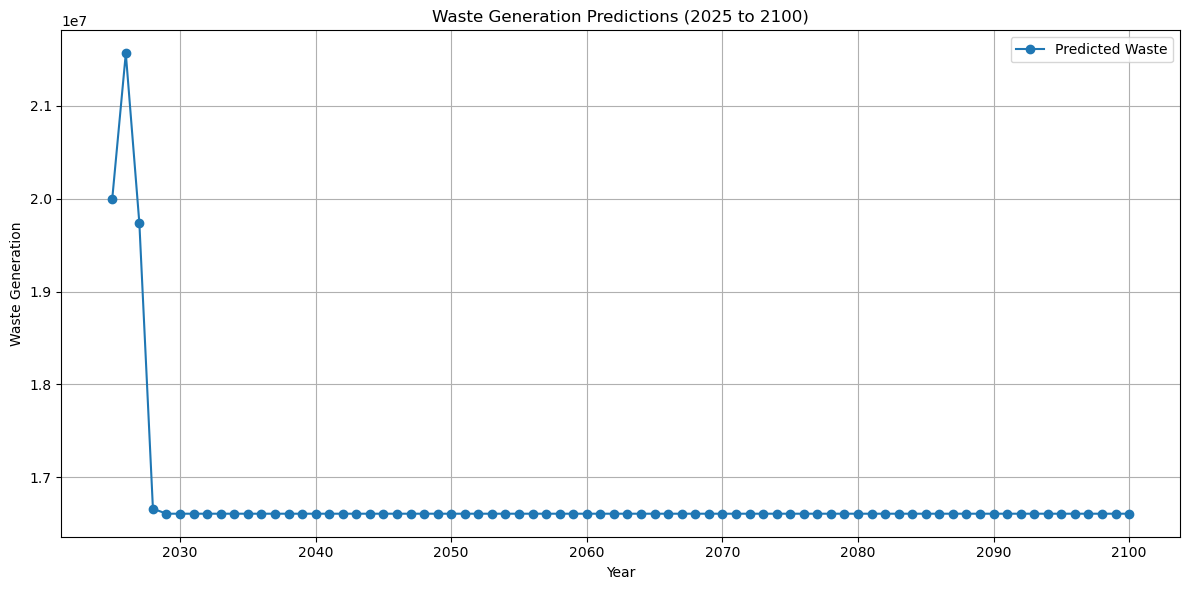

    year           gdp  householdMinIncome         death  predicted_waste  \
0   2025  1.673647e+06         8833.980000  5.033535e+05     1.524581e+07   
1   2026  1.729595e+06         8989.796923  1.258136e+06     1.527562e+07   
2   2027  1.786386e+06         9145.613846  3.144723e+06     1.530556e+07   
3   2028  1.844020e+06         9301.430769  7.860261e+06     1.533564e+07   
4   2029  1.902496e+06         9457.247692  1.964679e+07     1.536587e+07   
..   ...           ...                 ...           ...              ...   
71  2096  7.740714e+06        19896.981538  8.903293e+33     1.770663e+07   
72  2097  7.856512e+06        20052.798462  2.225386e+34     1.777923e+07   
73  2098  7.973154e+06        20208.615385  5.562370e+34     1.790309e+07   
74  2099  8.090638e+06        20364.432308  1.390319e+35     1.815422e+07   
75  2100  8.208965e+06        20520.249231  3.475115e+35     1.871463e+07   

    blended_waste  
0    1.641464e+07  
1    1.649892e+07  
2    1.658329e+

c:\Users\Sukonbu\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_16844\841212378.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


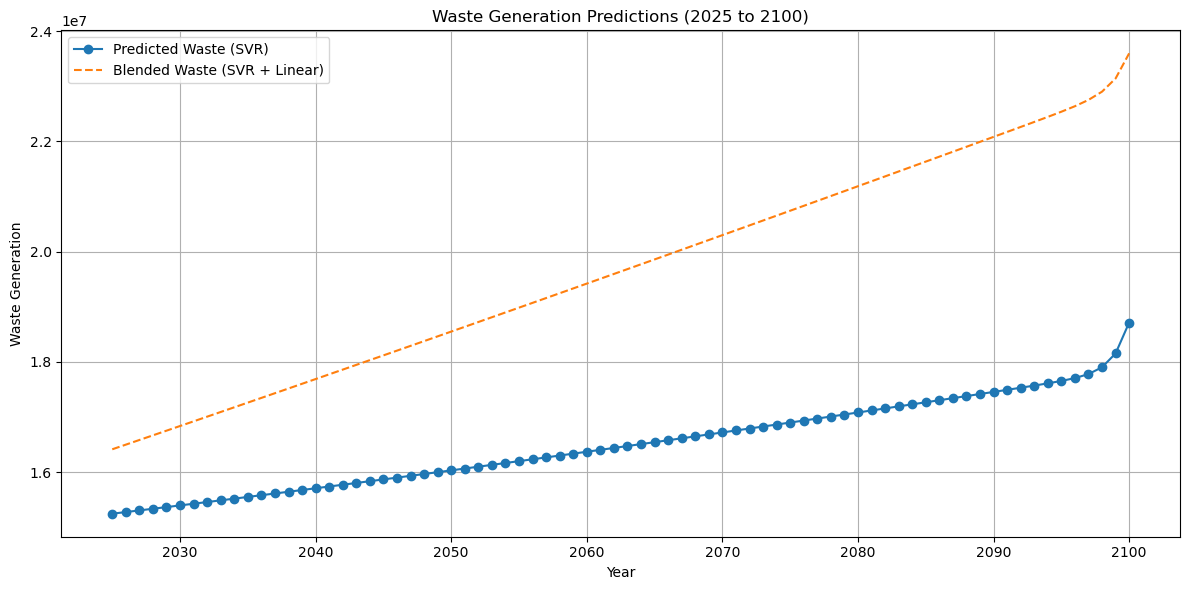

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_svr = grid_search.best_estimator_

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add polynomial or exponential trend prediction for each feature
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c

for feature in predicted_features:
    if feature in data.columns:
        trend_data = data[['year', feature]].dropna()

        if feature == 'gdp':
            # Use polynomial regression for GDP
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        elif feature == 'death':
            # Use exponential fit for death (to handle anomalies)
            try:
                popt, _ = curve_fit(exponential_growth, trend_data['year'], trend_data[feature], maxfev=10000)
                prediction_years = np.array(list(range(2025, end_year + 1)))
                feature_predictions[feature] = exponential_growth(prediction_years, *popt)
            except:
                # Fallback to linear regression if exponential fit fails
                linear_model = LinearRegression()
                linear_model.fit(trend_data[['year']], trend_data[feature])
                prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
                feature_predictions[feature] = linear_model.predict(prediction_years[['year']])
        else:
            # Use linear regression for householdMinIncome
            linear_model = LinearRegression()
            linear_model.fit(trend_data[['year']], trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            feature_predictions[feature] = linear_model.predict(prediction_years[['year']])

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Dynamic capping based on extended growth rates
for feature in predicted_features:
    if feature in data.columns:
        # Calculate historical growth rate
        growth_rate = (data[feature].iloc[-1] - data[feature].iloc[0]) / data[feature].iloc[0]
        extended_growth_rate = growth_rate * 1.5  # Increase growth rate by 50%
        prediction_years = prediction_data['year'] - data['year'].iloc[-1]
        max_value = data[feature].iloc[-1] * (1 + extended_growth_rate) ** prediction_years
        min_value = data[feature].min() * 0.8  # Allow 20% decrease from historical min
        prediction_data[feature] = prediction_data[feature].clip(lower=min_value, upper=max_value)

# Scale adjusted prediction data
scaler_X.fit(np.vstack([X, prediction_data[['year', 'gdp', 'householdMinIncome', 'death']].values]))
X_prediction_scaled = scaler_X.transform(prediction_data[['year', 'gdp', 'householdMinIncome', 'death']])

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Add linear regression trend for comparison
trend_model = LinearRegression()
trend_model.fit(data[['year']], data['waste'])
trend_predictions = trend_model.predict(prediction_data[['year']].values.reshape(-1, 1))

# Blend SVR and linear regression predictions
alpha = 0.7  # Weight for SVR
prediction_data['blended_waste'] = alpha * prediction_data['predicted_waste'] + (1 - alpha) * trend_predictions

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Calculate evaluation metrics on test data
y_test_pred_scaled = best_svr.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste (SVR)', marker='o')
plt.plot(prediction_data['year'], prediction_data['blended_waste'], label='Blended Waste (SVR + Linear)', linestyle='--')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


    year           gdp  householdMinIncome         death  predicted_waste  \
0   2025  1.673647e+06         8833.980000  2.190121e+05     1.532499e+07   
1   2026  1.729595e+06         8989.796923  2.265509e+05     1.535988e+07   
2   2027  1.786386e+06         9145.613846  2.343139e+05     1.539507e+07   
3   2028  1.844020e+06         9301.430769  2.423013e+05     1.543056e+07   
4   2029  1.902496e+06         9457.247692  2.505128e+05     1.546634e+07   
..   ...           ...                 ...           ...              ...   
71  2096  7.740714e+06        19896.981538  1.311567e+06     1.849919e+07   
72  2097  7.856512e+06        20052.798462  1.335029e+06     1.855277e+07   
73  2098  7.973154e+06        20208.615385  1.358715e+06     1.860654e+07   
74  2099  8.090638e+06        20364.432308  1.382625e+06     1.866050e+07   
75  2100  8.208965e+06        20520.249231  1.406760e+06     1.871463e+07   

    blended_waste  
0    1.647006e+07  
1    1.655790e+07  
2    1.664595e+

c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


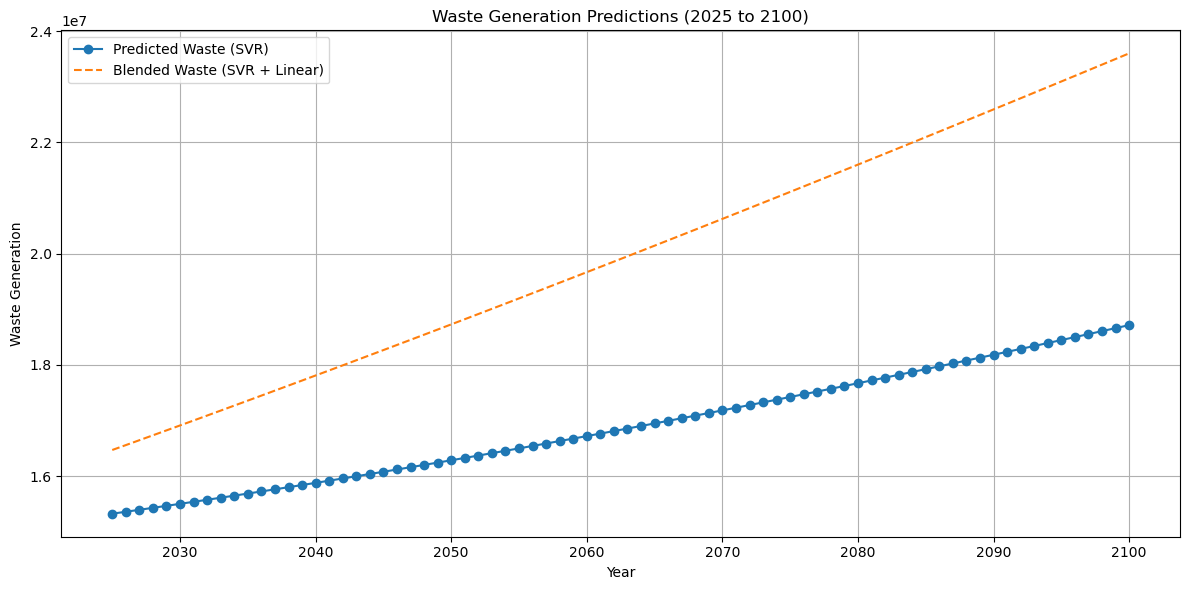

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_svr = grid_search.best_estimator_

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add polynomial or exponential trend prediction for each feature
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c

for feature in predicted_features:
    if feature in data.columns:
        trend_data = data[['year', feature]].dropna()

        if feature == 'gdp':
            # Use polynomial regression for GDP
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        elif feature == 'death':
            # Use polynomial regression for death
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        else:
            # Use linear regression for householdMinIncome
            linear_model = LinearRegression()
            linear_model.fit(trend_data[['year']], trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            feature_predictions[feature] = linear_model.predict(prediction_years[['year']])

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Dynamic capping based on extended growth rates
for feature in predicted_features:
    if feature in data.columns:
        # Calculate historical growth rate
        growth_rate = (data[feature].iloc[-1] - data[feature].iloc[0]) / data[feature].iloc[0]
        extended_growth_rate = growth_rate * 1.5  # Increase growth rate by 50%
        prediction_years = prediction_data['year'] - data['year'].iloc[-1]
        max_value = data[feature].iloc[-1] * (1 + extended_growth_rate) ** prediction_years
        min_value = data[feature].min() * 0.8  # Allow 20% decrease from historical min
        prediction_data[feature] = prediction_data[feature].clip(lower=min_value, upper=max_value)

# Scale adjusted prediction data, including 'year'
scaler_X.fit(np.vstack([X, prediction_data[['year', 'gdp', 'householdMinIncome', 'death']].values]))
X_prediction_scaled = scaler_X.transform(prediction_data[['year', 'gdp', 'householdMinIncome', 'death']])

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Add linear regression trend for comparison
trend_model = LinearRegression()
trend_model.fit(data[['year']], data['waste'])
trend_predictions = trend_model.predict(prediction_data[['year']].values.reshape(-1, 1))

# Blend SVR and linear regression predictions
alpha = 0.7  # Weight for SVR
prediction_data['blended_waste'] = alpha * prediction_data['predicted_waste'] + (1 - alpha) * trend_predictions

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Calculate evaluation metrics on test data
y_test_pred_scaled = best_svr.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste (SVR)', marker='o')
plt.plot(prediction_data['year'], prediction_data['blended_waste'], label='Blended Waste (SVR + Linear)', linestyle='--')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_svr = grid_search.best_estimator_

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['population', 'gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add polynomial or exponential trend prediction for each feature
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c

for feature in predicted_features:
    if feature in data.columns:
        trend_data = data[['year', feature]].dropna()

        if feature == 'gdp':
            # Use polynomial regression for GDP
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        elif feature == 'death':
            # Use polynomial regression for death
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        else:
            # Use linear regression for householdMinIncome
            linear_model = LinearRegression()
            linear_model.fit(trend_data[['year']], trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            feature_predictions[feature] = linear_model.predict(prediction_years[['year']])

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Dynamic capping based on extended growth rates
for feature in predicted_features:
    if feature in data.columns:
        # Calculate historical growth rate
        growth_rate = (data[feature].iloc[-1] - data[feature].iloc[0]) / data[feature].iloc[0]
        extended_growth_rate = growth_rate * 1.5  # Increase growth rate by 50%
        prediction_years = prediction_data['year'] - data['year'].iloc[-1]
        max_value = data[feature].iloc[-1] * (1 + extended_growth_rate) ** prediction_years
        min_value = data[feature].min() * 0.8  # Allow 20% decrease from historical min
        prediction_data[feature] = prediction_data[feature].clip(lower=min_value, upper=max_value)

# Scale adjusted prediction data
scaler_X.fit(np.vstack([X[['population', 'gdp', 'householdMinIncome', 'death']], prediction_data[['population', 'gdp', 'householdMinIncome', 'death']].values]))
X_prediction_scaled = scaler_X.transform(prediction_data[['population', 'gdp', 'householdMinIncome', 'death']])

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Add linear regression trend for comparison
trend_model = LinearRegression()
trend_model.fit(data[['year']], data['waste'])
trend_predictions = trend_model.predict(prediction_data[['year']].values.reshape(-1, 1))

# Blend SVR and linear regression predictions
alpha = 0.7  # Weight for SVR
prediction_data['blended_waste'] = alpha * prediction_data['predicted_waste'] + (1 - alpha) * trend_predictions

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Calculate evaluation metrics on test data
y_test_pred_scaled = best_svr.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste (SVR)', marker='o')
plt.plot(prediction_data['year'], prediction_data['blended_waste'], label='Blended Waste (SVR + Linear)', linestyle='--')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but SVR is expecting 5 features as input.

    year    population           gdp  householdMinIncome          death  \
0   2025  3.494477e+07  1.673647e+06         8833.980000  219012.135654   
1   2026  3.538372e+07  1.729595e+06         8989.796923  226550.908497   
2   2027  3.582266e+07  1.786386e+06         9145.613846  234313.947932   
3   2028  3.626160e+07  1.844020e+06         9301.430769  242301.253959   
4   2029  3.670054e+07  1.902496e+06         9457.247692  250512.826579   
5   2030  3.713948e+07  1.961816e+06         9613.064615  258948.665791   
6   2031  3.757843e+07  2.021979e+06         9768.881538  267608.771596   
7   2032  3.801737e+07  2.082985e+06         9924.698462  276493.143992   
8   2033  3.845631e+07  2.144834e+06        10080.515385  285601.782982   
9   2034  3.889525e+07  2.207525e+06        10236.332308  294934.688563   
10  2035  3.933420e+07  2.271060e+06        10392.149231  304491.860737   
11  2036  3.977314e+07  2.335437e+06        10547.966154  314273.299503   
12  2037  4.021208e+07  2

c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Sukonbu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


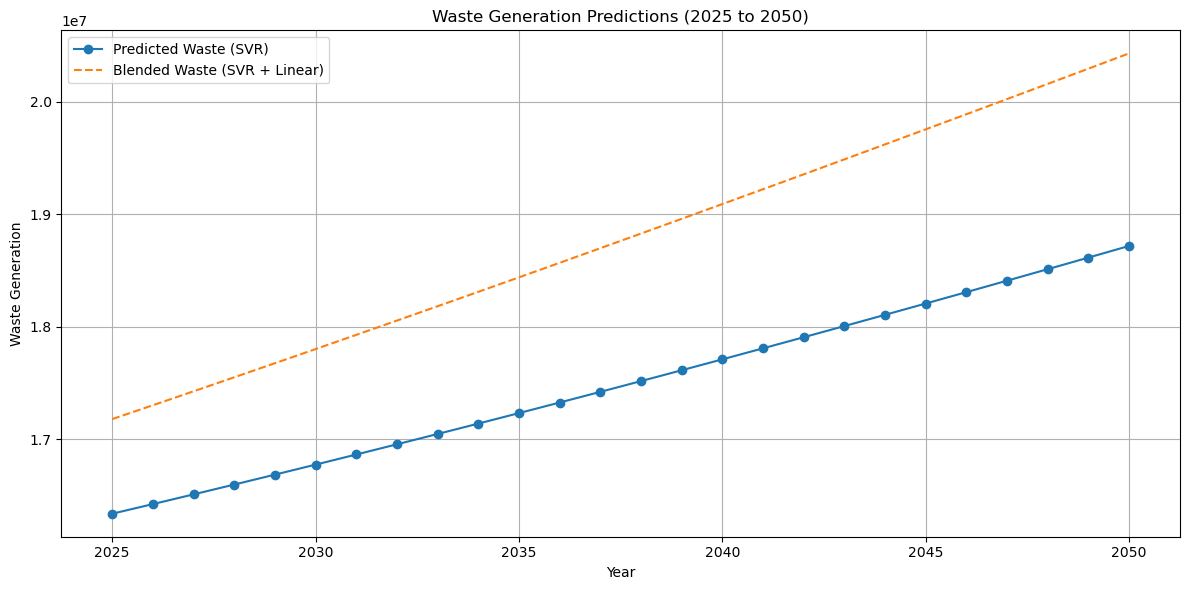

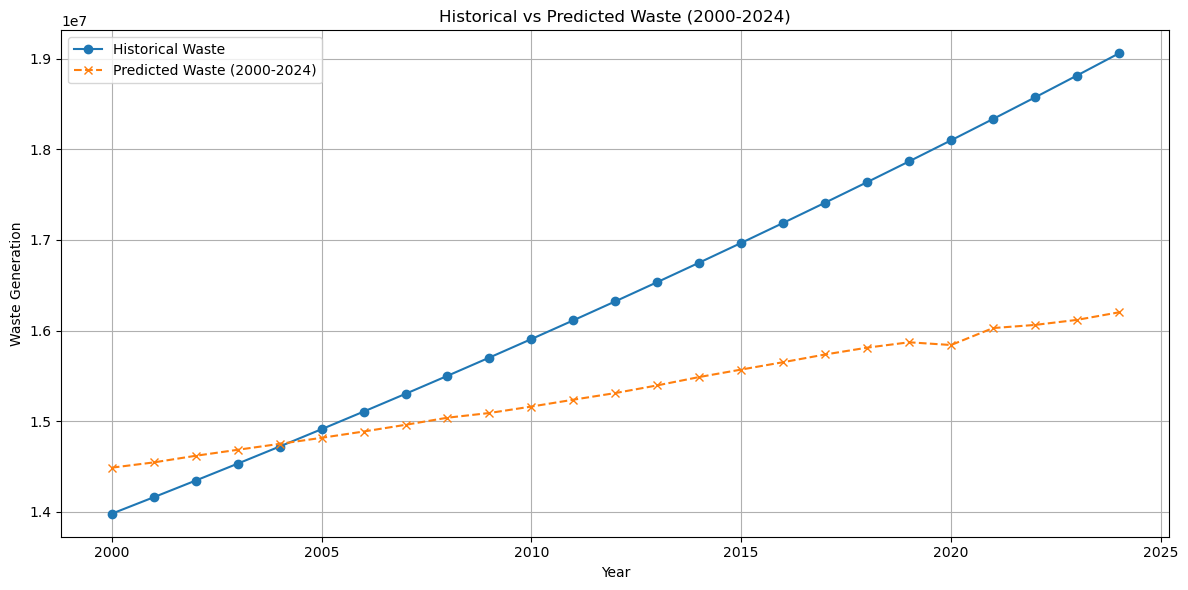

    year     waste  predicted_waste
0   2000  13979399     1.448742e+07
1   2001  14161131     1.454548e+07
2   2002  14345225     1.461870e+07
3   2003  14531713     1.468468e+07
4   2004  14720625     1.474997e+07
5   2005  14911992     1.481685e+07
6   2006  15105848     1.488624e+07
7   2007  15302224     1.496035e+07
8   2008  15501153     1.503884e+07
9   2009  15702667     1.509084e+07
10  2010  15906802     1.516182e+07
11  2011  16113590     1.523763e+07
12  2012  16323066     1.531084e+07
13  2013  16535266     1.539563e+07
14  2014  16750224     1.548775e+07
15  2015  16967977     1.557013e+07
16  2016  17188560     1.565149e+07
17  2017  17412011     1.573655e+07
18  2018  17638367     1.581183e+07
19  2019  17867665     1.587112e+07
20  2020  18099945     1.584102e+07
21  2021  18335244     1.602798e+07
22  2022  18573601     1.606267e+07
23  2023  18815058     1.611829e+07
24  2024  19059654     1.620177e+07


In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Initialize scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale input and target variables
X = data[['population', 'gdp', 'householdMinIncome', 'death']]  # Exclude 'year'
y = data['waste'].values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train the SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y_scaled.ravel())
best_svr = grid_search.best_estimator_

# Get user input for the prediction year
end_year = int(input("Enter the year you want to predict up to (e.g., 2100): "))

# Predict missing features using trends
predicted_features = ['population', 'gdp', 'householdMinIncome', 'death']
feature_predictions = {}

# Add polynomial or exponential trend prediction for each feature
def exponential_growth(x, a, b, c):
    return a * np.exp(b * x) + c

for feature in predicted_features:
    if feature in data.columns:
        trend_data = data[['year', feature]].dropna()

        if feature == 'gdp':
            # Use polynomial regression for GDP
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        elif feature == 'death':
            # Use polynomial regression for death
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(trend_data[['year']])
            poly_model = LinearRegression()
            poly_model.fit(X_poly, trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            X_future_poly = poly.transform(prediction_years[['year']])
            feature_predictions[feature] = poly_model.predict(X_future_poly)
        else:
            # Use linear regression for householdMinIncome
            linear_model = LinearRegression()
            linear_model.fit(trend_data[['year']], trend_data[feature])
            prediction_years = pd.DataFrame({'year': list(range(2025, end_year + 1))})
            feature_predictions[feature] = linear_model.predict(prediction_years[['year']])

# Combine predictions into a DataFrame
prediction_data = pd.DataFrame({
    'year': list(range(2025, end_year + 1))
})
for feature in predicted_features:
    prediction_data[feature] = feature_predictions.get(feature, [0] * len(prediction_data))

# Dynamic capping based on extended growth rates
for feature in predicted_features:
    if feature in data.columns:
        # Calculate historical growth rate
        growth_rate = (data[feature].iloc[-1] - data[feature].iloc[0]) / data[feature].iloc[0]
        extended_growth_rate = growth_rate * 1.5  # Increase growth rate by 50%
        prediction_years = prediction_data['year'] - data['year'].iloc[-1]
        max_value = data[feature].iloc[-1] * (1 + extended_growth_rate) ** prediction_years
        min_value = data[feature].min() * 0.8  # Allow 20% decrease from historical min
        prediction_data[feature] = prediction_data[feature].clip(lower=min_value, upper=max_value)

# Scale adjusted prediction data
scaler_X.fit(np.vstack([X[['population', 'gdp', 'householdMinIncome', 'death']], prediction_data[['population', 'gdp', 'householdMinIncome', 'death']].values]))
X_prediction_scaled = scaler_X.transform(prediction_data[['population', 'gdp', 'householdMinIncome', 'death']])

# Predict waste generation using the SVR model
y_prediction_scaled = best_svr.predict(X_prediction_scaled)
y_prediction = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).ravel()

# Add waste predictions to the DataFrame
prediction_data['predicted_waste'] = y_prediction

# Add linear regression trend for comparison
trend_model = LinearRegression()
trend_model.fit(data[['year']], data['waste'])
trend_predictions = trend_model.predict(prediction_data[['year']].values.reshape(-1, 1))

# Blend SVR and linear regression predictions
alpha = 0.7  # Weight for SVR
prediction_data['blended_waste'] = alpha * prediction_data['predicted_waste'] + (1 - alpha) * trend_predictions

# Save predictions to CSV
prediction_data.to_csv(f'Waste_Predictions_2025_to_{end_year}.csv', index=False)

# Display results
print(prediction_data)

# Prepare test data with correct features
X_test = data[['population', 'gdp', 'householdMinIncome', 'death']]
X_test_scaled = scaler_X.transform(X_test.to_numpy())

# Calculate evaluation metrics on test data
y_test_pred_scaled = best_svr.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_actual = scaler_y.inverse_transform(y.reshape(-1, 1))

mae = mean_absolute_error(y_test_actual, y_test_pred)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prediction_data['year'], prediction_data['predicted_waste'], label='Predicted Waste (SVR)', marker='o')
plt.plot(prediction_data['year'], prediction_data['blended_waste'], label='Blended Waste (SVR + Linear)', linestyle='--')
plt.title(f'Waste Generation Predictions (2025 to {end_year})')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Predict waste for 2000 to 2024
comparison_years = data[data['year'].between(2000, 2024)]
X_comparison = comparison_years[['population', 'gdp', 'householdMinIncome', 'death']]
y_comparison_actual = comparison_years['waste'].values

# Scale comparison data for 2000-2024
X_comparison_scaled = scaler_X.transform(X_comparison.to_numpy())

# Predict waste using the SVR model
y_comparison_scaled = best_svr.predict(X_comparison_scaled)
y_comparison_predicted = scaler_y.inverse_transform(y_comparison_scaled.reshape(-1, 1)).ravel()

# Add predicted waste to the comparison DataFrame
comparison_years['predicted_waste'] = y_comparison_predicted

# Plot historical vs predicted waste
plt.figure(figsize=(12, 6))
plt.plot(comparison_years['year'], comparison_years['waste'], label='Historical Waste', marker='o')
plt.plot(comparison_years['year'], comparison_years['predicted_waste'], label='Predicted Waste (2000-2024)', linestyle='--', marker='x')
plt.title('Historical vs Predicted Waste (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display comparison DataFrame
print(comparison_years[['year', 'waste', 'predicted_waste']])


Mean Absolute Error (MAE): 378832.87696278933
Mean Squared Error (MSE): 156504186743.96283
R^2 Score: 0.371724638790371


C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_16844\1720731049.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_waste'] = y_test_pred


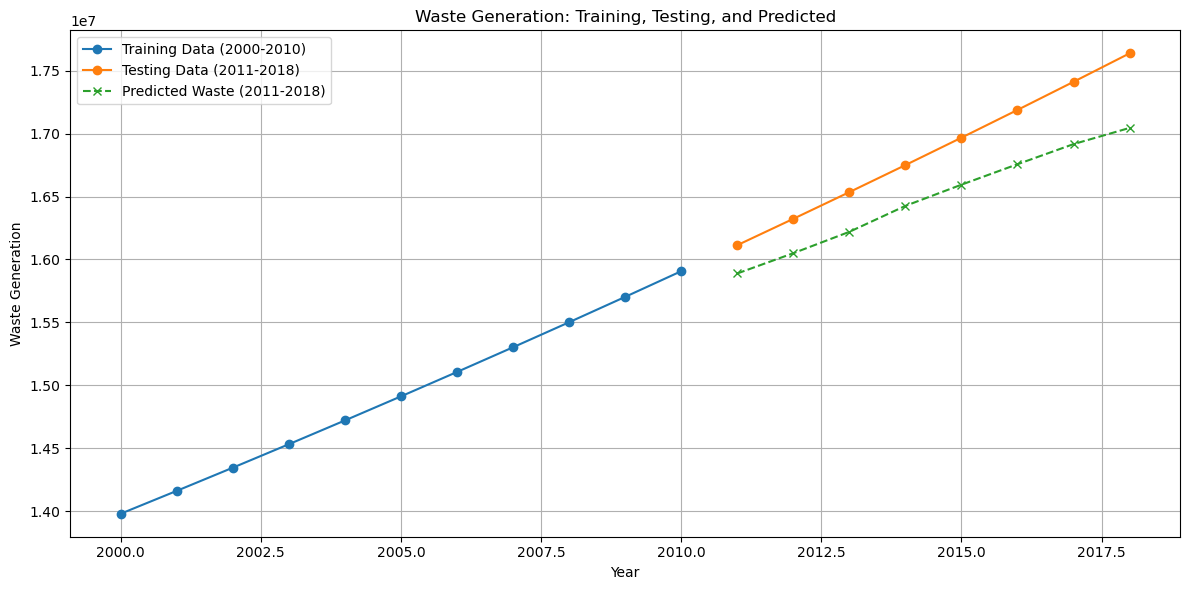

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Split data into training (2000-2010) and testing (2011-2018)
train_data = data[data['year'].between(2000, 2010)]
test_data = data[data['year'].between(2011, 2018)]

# Prepare training and testing sets
X_train = train_data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y_train = train_data['waste'].values.reshape(-1, 1)

X_test = test_data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y_test = test_data['waste'].values.reshape(-1, 1)

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Train SVR model with hyperparameter tuning
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled.ravel())
best_svr = grid_search.best_estimator_

# Predict on test data
y_test_pred_scaled = best_svr.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate predictions
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Combine predictions with historical data for projection
test_data['predicted_waste'] = y_test_pred

# Plot historical vs predicted waste
plt.figure(figsize=(12, 6))
plt.plot(train_data['year'], train_data['waste'], label='Training Data (2000-2010)', marker='o')
plt.plot(test_data['year'], test_data['waste'], label='Testing Data (2011-2018)', marker='o')
plt.plot(test_data['year'], test_data['predicted_waste'], label='Predicted Waste (2011-2018)', linestyle='--', marker='x')
plt.title('Waste Generation: Training, Testing, and Predicted')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest Performance:
Mean Absolute Error (MAE): 1075165.134999998
Mean Squared Error (MSE): 1405081331721.048
R^2 Score: -4.640602974156545


C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_16844\568223285.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_waste_rf'] = y_test_pred_rf


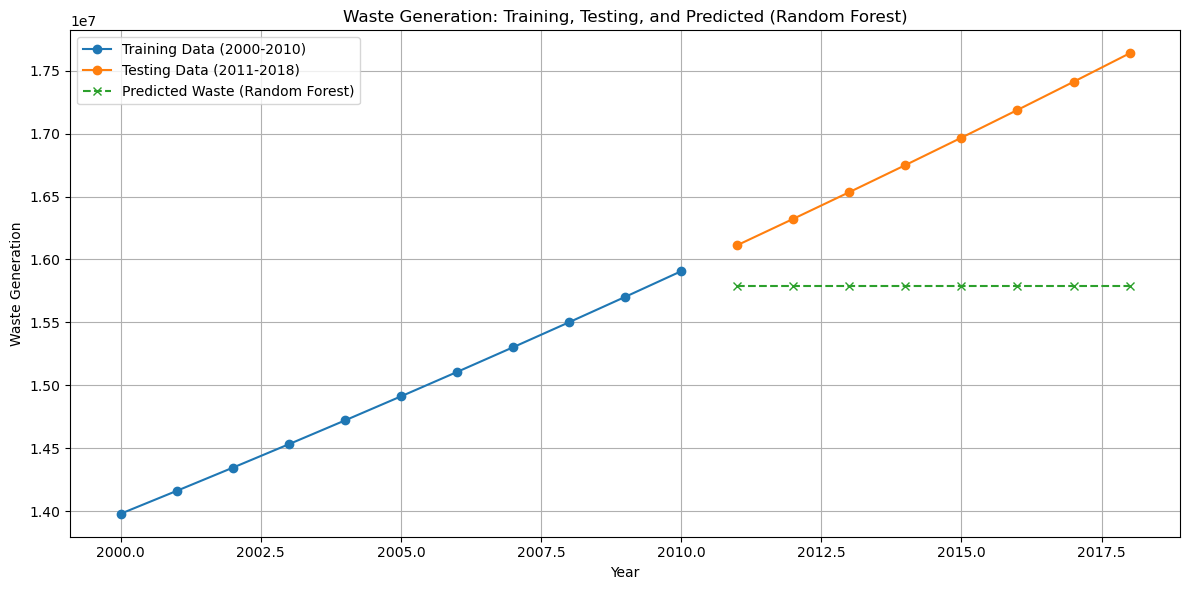